### Create a Linear Regression (LR) model based on the indicated variables

| Dataset | Linear Regression |
| ------ | ------ |
| Housing 2 | Price vs Area |

In [4]:
import pandas as pd # Dataframe handling
import numpy as np # Numeric python, functions for calculations

import plotly.graph_objects as go # and more graphs
import matplotlib.pyplot as plt # graphs
import seaborn as sns

from sklearn.linear_model import LinearRegression # Linear regression models
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

df = pd.read_csv('Housing2.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished
1,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
2,4340000,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished
3,4319000,4032,2,1,1,yes,no,yes,no,no,0,no,furnished
4,4305000,4400,2,1,1,yes,no,no,no,no,1,no,semi-furnished


In [5]:
x = df[['area']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [6]:
slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = slr.predict(x_test)

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 477911.1165054845
Mean Squared Error: 353399599576.1634
Root Mean Squared Error: 594474.2211199434


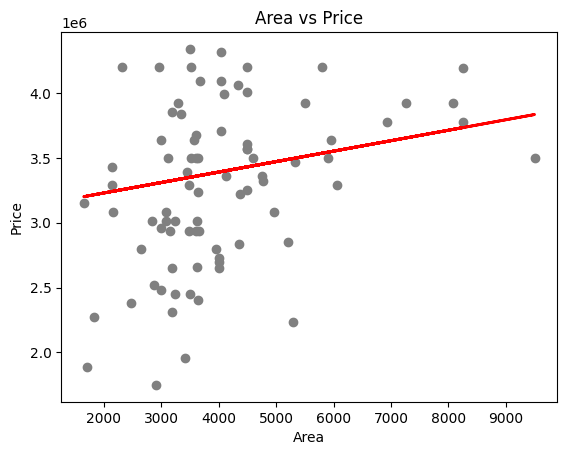

In [9]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

In [31]:
#Printing the model coefficients and the model itself
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  3068279.985361067
Coefficient: [80.63454916]


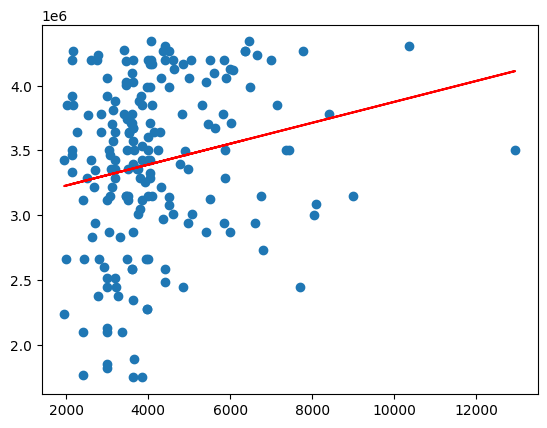

In [36]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, slr.intercept_ + slr.coef_ * x_train, 'r')
plt.show()

In [37]:
#Prediction of Test and Training set result
y_pred_slr= slr.predict(x_test)
x_pred_slr= slr.predict(x_train)

In [38]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
59,3920000,3.653687e+06
139,3430000,3.241241e+06
220,2800000,3.281962e+06
134,3465000,3.497256e+06
190,3080000,3.242451e+06
...,...,...
54,3990000,3.398882e+06
148,3360000,3.400494e+06
194,3010000,3.317441e+06
144,3395000,3.346469e+06


In [39]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 5.69


In [40]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 477911.1165054845
Mean Square Error: 353399599576.1634
Root Mean Square Error: 594474.2211199434
